In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
dt = pd.read_excel('./nckh.xlsx')
dt.head()

,Year,Country,S&P_credit_raitng,Total_weight,Grownth_GDP,Inflation_rate,GDP_per_capital,Fiscal_Balance,Government_debt,Current_account_balance,Government_Effectiveness,Control_of_curruption
0,2006,CHN,1,0.953172,10.713288,1.649431,2099.229435,-0.76,25.38,8.424126,0.070475,-0.514581
1,2006,GBR,1,0.953172,2.584105,2.455662,44472.574235,-2.57,39.95,-2.814397,1.670994,1.792327
2,2006,BRA,0,0.247159,3.961989,4.183568,5886.463682,-3.57,55.48,1.181714,-0.320333,-0.109042
3,2006,RUS,1,0.861370,8.200068,9.668655,6920.189125,6.29,9.79,9.325459,-0.438045,-0.910895
4,2006,FRA,1,0.953172,2.449324,1.675124,36443.626306,-2.40,64.60,0.022183,1.632802,1.463727


In [2]:
dt.describe()

,Year,S&P_credit_raitng,Total_weight,Grownth_GDP,Inflation_rate,GDP_per_capital,Fiscal_Balance,Government_debt,Current_account_balance,Government_Effectiveness,Control_of_curruption
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,2013.168539,0.583521,0.264380,2.895340,3.627695,19457.241003,-2.680689,51.297386,-1.165721,0.456950,0.324812
std,4.095293,0.493160,0.305749,3.299389,3.324640,19978.993224,3.837990,30.909967,6.532931,0.887844,1.033466
min,2006.000000,0.000000,0.000000,-4.466320,-4.576588,471.318822,-11.550000,0.050000,-16.341817,-1.629395,-1.443944
25%,2010.000000,0.000000,0.033702,1.226033,1.279460,4040.774660,-4.860000,29.020000,-4.950439,-0.225388,-0.453342
50%,2013.000000,1.000000,0.124094,2.933442,2.780567,10241.727828,-2.600000,44.510000,-1.585418,0.300470,0.059148
75%,2017.000000,1.000000,0.401490,5.020935,5.183491,30705.569223,-0.400000,68.600000,2.643813,1.186218,1.137221
max,2020.000000,1.000000,0.953172,10.713288,11.039538,70702.761066,6.290000,127.970000,14.035191,2.436975,2.469991


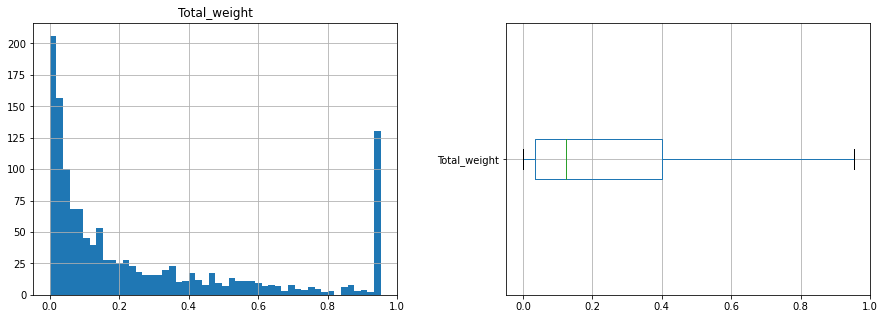

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Total_weight"]].hist(bins=50, ax=axes[0]);
dt[["Total_weight"]].boxplot(ax=axes[1], vert=False);


# Identify the exception and pull the interval

In [4]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
   
    
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper
    
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

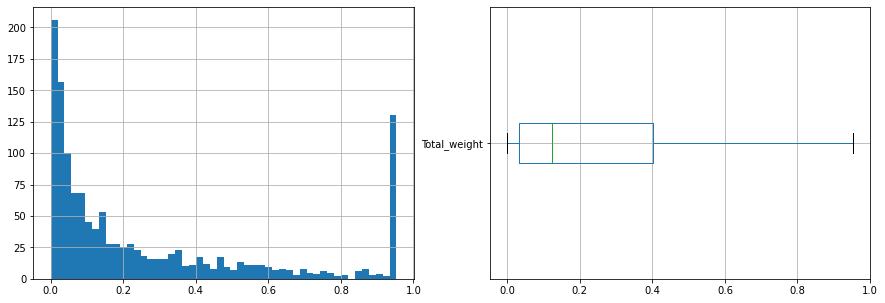

In [5]:
clipped_Total_weight = BoxplotOutlierClipper().fit_transform(dt["Total_weight"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Total_weight.hist(bins=50, ax=axes[0])
clipped_Total_weight.to_frame().boxplot(ax=axes[1], vert=False);

# Export data after processing

In [6]:
!pip install openpyxl
import openpyxl as ol

In [7]:
clipped_Total_weight.to_excel('./Book1.xlsx', sheet_name='Sheet1', index = False)

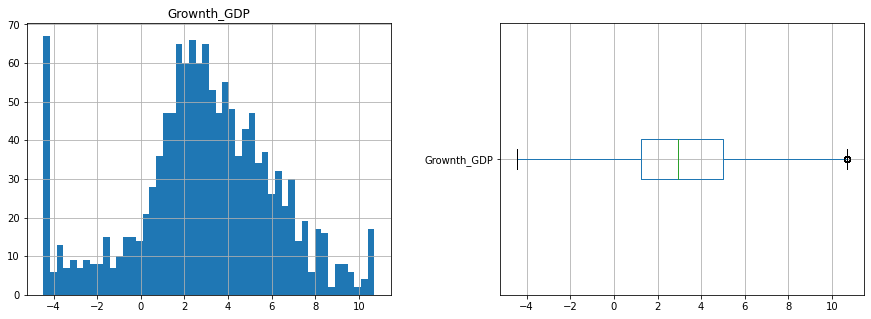

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Grownth_GDP"]].hist(bins=50, ax=axes[0]);
dt[["Grownth_GDP"]].boxplot(ax=axes[1], vert=False);


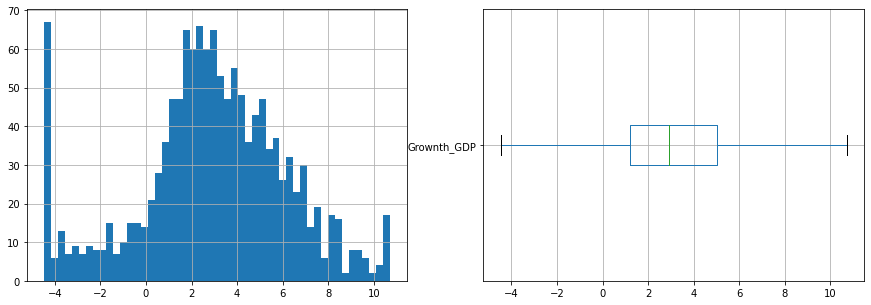

In [9]:
clipped_Grownth_GDP = BoxplotOutlierClipper().fit_transform(dt["Grownth_GDP"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Grownth_GDP.hist(bins=50, ax=axes[0])
clipped_Grownth_GDP.to_frame().boxplot(ax=axes[1], vert=False);

In [10]:
clipped_Grownth_GDP.to_excel('./Book2.xlsx', sheet_name='Sheet1', index = False)

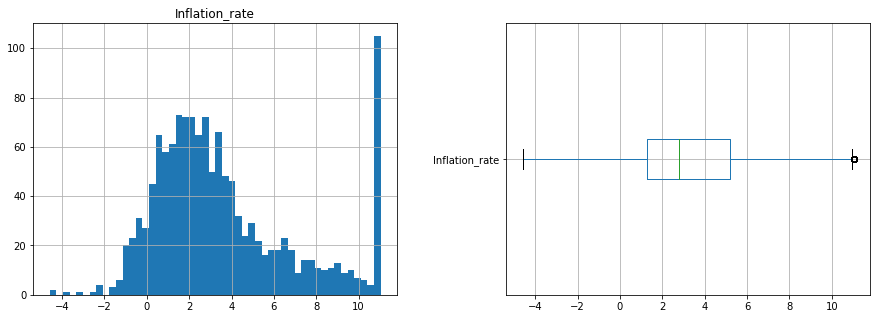

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Inflation_rate"]].hist(bins=50, ax=axes[0]);
dt[["Inflation_rate"]].boxplot(ax=axes[1], vert=False);


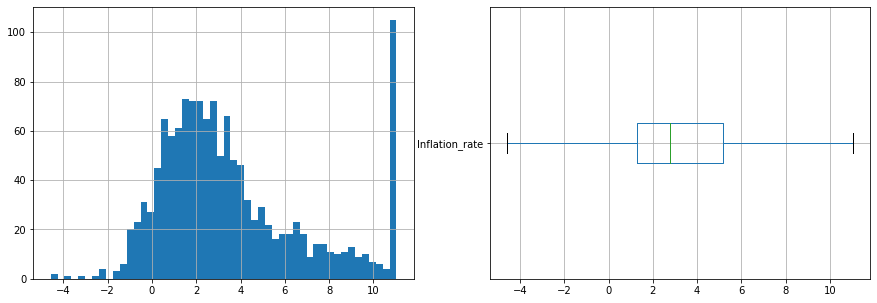

In [12]:
clipped_Inflation_rate = BoxplotOutlierClipper().fit_transform(dt["Inflation_rate"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Inflation_rate.hist(bins=50, ax=axes[0])
clipped_Inflation_rate.to_frame().boxplot(ax=axes[1], vert=False);

In [13]:
clipped_Inflation_rate.to_excel('./Book3.xlsx', sheet_name='Sheet1', index = False)

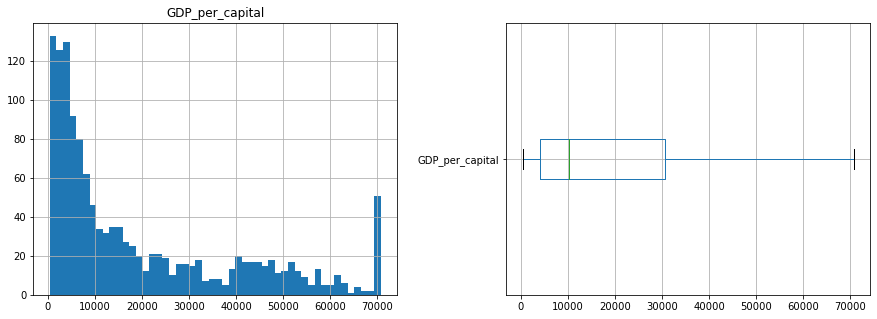

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["GDP_per_capital"]].hist(bins=50, ax=axes[0]);
dt[["GDP_per_capital"]].boxplot(ax=axes[1], vert=False);


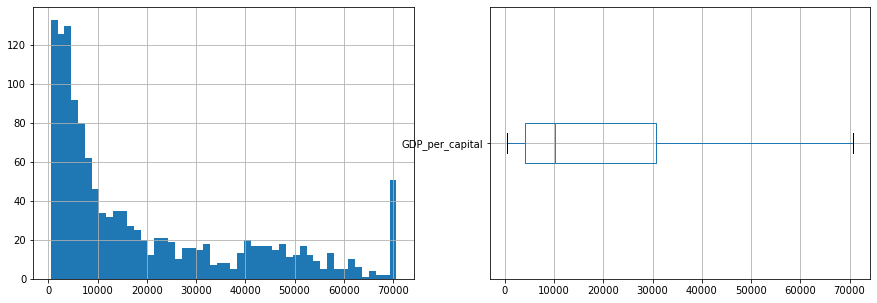

In [15]:
clipped_GDP_per_capital = BoxplotOutlierClipper().fit_transform(dt["GDP_per_capital"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_GDP_per_capital.hist(bins=50, ax=axes[0])
clipped_GDP_per_capital.to_frame().boxplot(ax=axes[1], vert=False);

In [16]:
clipped_GDP_per_capital.to_excel('./Book4.xlsx', sheet_name='Sheet1', index = False)

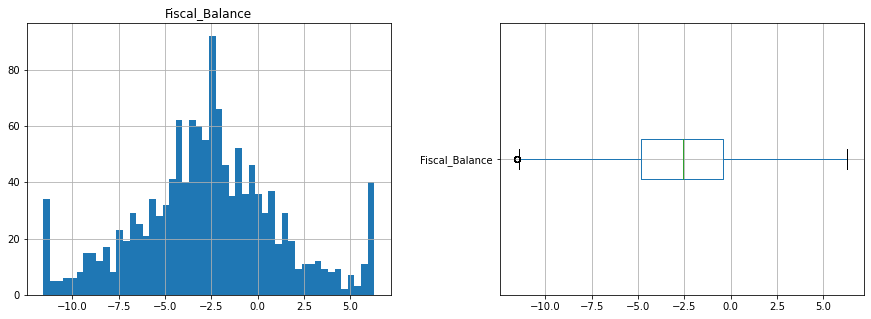

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Fiscal_Balance"]].hist(bins=50, ax=axes[0]);
dt[["Fiscal_Balance"]].boxplot(ax=axes[1], vert=False);


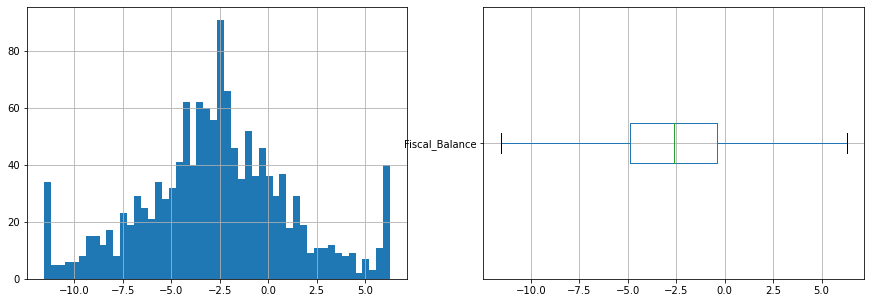

In [18]:
clipped_Fiscal_Balance = BoxplotOutlierClipper().fit_transform(dt["Fiscal_Balance"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Fiscal_Balance.hist(bins=50, ax=axes[0])
clipped_Fiscal_Balance.to_frame().boxplot(ax=axes[1], vert=False);

In [19]:
clipped_Fiscal_Balance.to_excel('./Book5.xlsx', sheet_name='Sheet1', index = False)

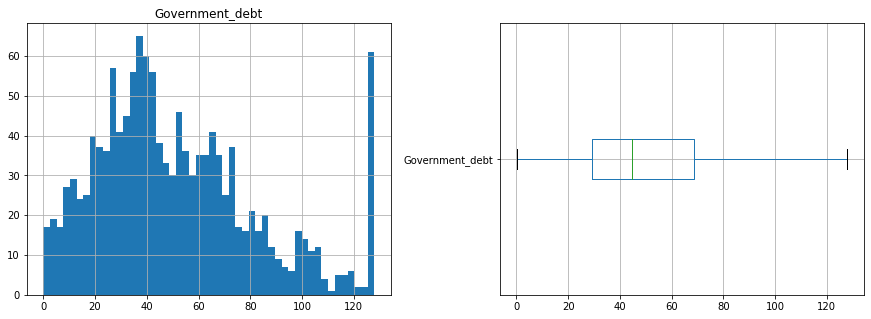

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Government_debt"]].hist(bins=50, ax=axes[0]);
dt[["Government_debt"]].boxplot(ax=axes[1], vert=False);


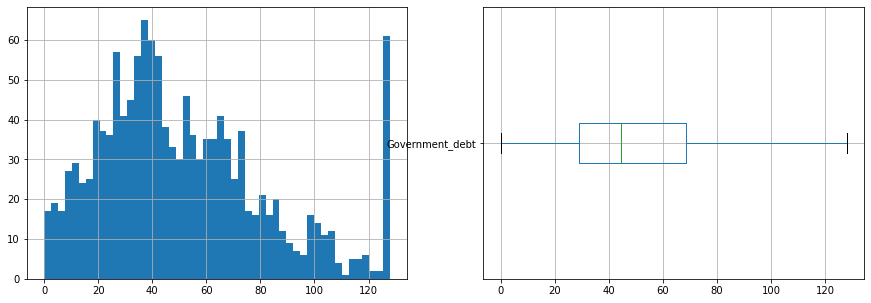

In [21]:
clipped_Government_debt = BoxplotOutlierClipper().fit_transform(dt["Government_debt"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Government_debt.hist(bins=50, ax=axes[0])
clipped_Government_debt.to_frame().boxplot(ax=axes[1], vert=False);

In [22]:
clipped_Government_debt	.to_excel('./Book6.xlsx', sheet_name='Sheet1', index = False)

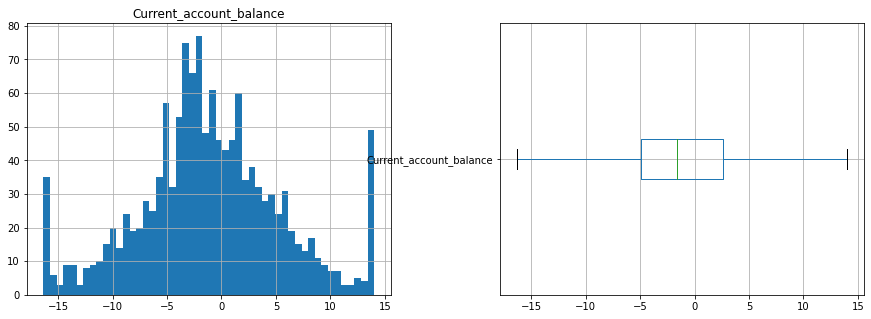

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Current_account_balance"]].hist(bins=50, ax=axes[0]);
dt[["Current_account_balance"]].boxplot(ax=axes[1], vert=False);


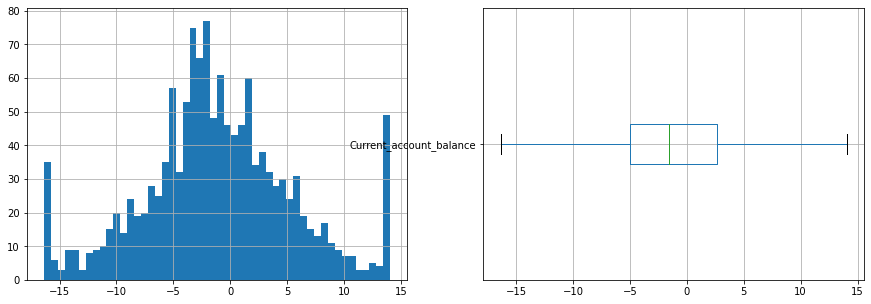

In [24]:
clipped_Current_account_balance = BoxplotOutlierClipper().fit_transform(dt["Current_account_balance"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Current_account_balance.hist(bins=50, ax=axes[0])
clipped_Current_account_balance.to_frame().boxplot(ax=axes[1], vert=False);

In [25]:
clipped_Current_account_balance.to_excel('./Book7.xlsx', sheet_name='Sheet1', index = False)

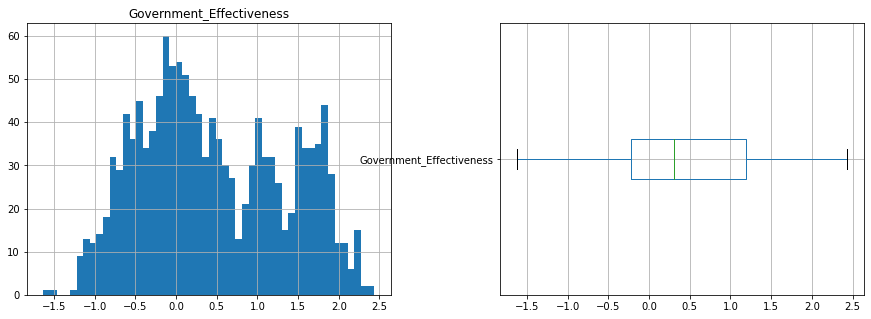

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Government_Effectiveness"]].hist(bins=50, ax=axes[0]);
dt[["Government_Effectiveness"]].boxplot(ax=axes[1], vert=False);


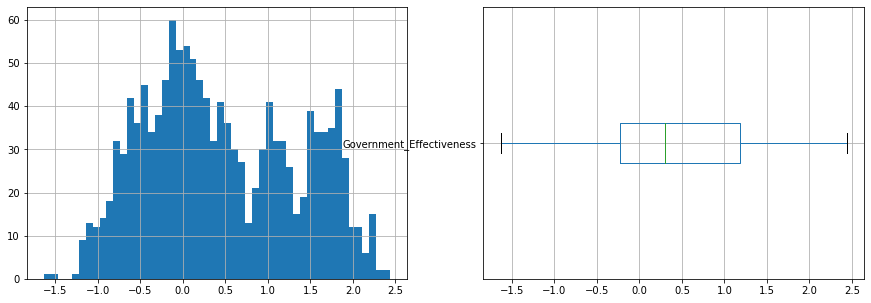

In [27]:
clipped_Government_Effectiveness = BoxplotOutlierClipper().fit_transform(dt["Government_Effectiveness"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Government_Effectiveness.hist(bins=50, ax=axes[0])
clipped_Government_Effectiveness.to_frame().boxplot(ax=axes[1], vert=False);

In [28]:
clipped_Government_Effectiveness.to_excel('./Book8.xlsx', sheet_name='Sheet1', index = False)

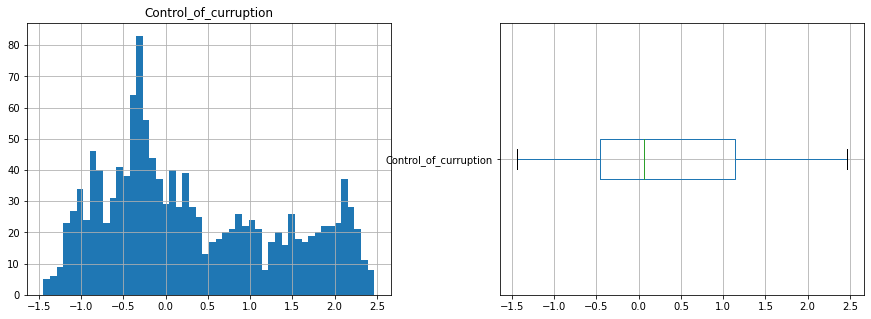

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
dt[["Control_of_curruption"]].hist(bins=50, ax=axes[0]);
dt[["Control_of_curruption"]].boxplot(ax=axes[1], vert=False);


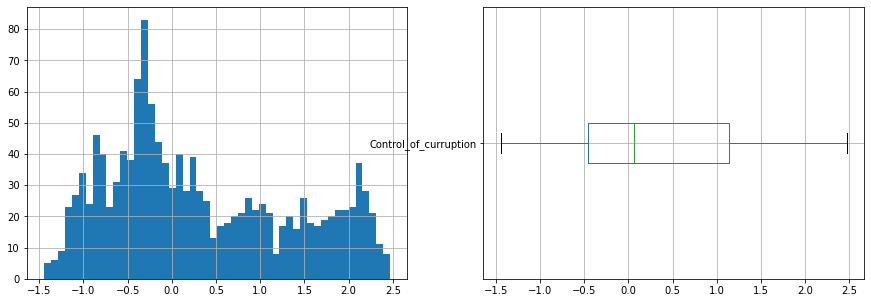

In [30]:
clipped_Control_of_curruption = BoxplotOutlierClipper().fit_transform(dt["Control_of_curruption"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
clipped_Control_of_curruption.hist(bins=50, ax=axes[0])
clipped_Control_of_curruption.to_frame().boxplot(ax=axes[1], vert=False);

In [31]:
clipped_Control_of_curruption.to_excel('./Book9.xlsx', sheet_name='Sheet1', index = False)